In [291]:
#Imports relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import gzip

In [271]:
#reading in data as pd dataframe
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Appliances.json.gz')
df_meta = getDF('meta_Appliances.json.gz')

algo 1:
- when a product is given, find top 5 ave ranking products that is also bought with it.
- if there are more than 5 proucts with the same highest ranking, randomly generate 5.
- if no records for its 'also_buy', use the same logic from a pool of products of the same brand.
- if not more than 5 or no same brand, generate the rest from a pool of top selling products.

In [ ]:
##prepare product vs their also_buy products

In [362]:
sliced_df_meta = df_meta[['asin','title','brand','also_buy']]
sliced_df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26041 entries, 0 to 30444
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   asin      26041 non-null  object
 1   title     26041 non-null  object
 2   brand     26041 non-null  object
 3   also_buy  26041 non-null  object
dtypes: object(4)
memory usage: 2.0+ MB


In [363]:
sliced_df_meta.head(1)

,asin,title,brand,also_buy
0,7301113188,Tupperware Freezer Square Round Container Set of 6,Tupperware,[]


In [365]:
#drop Nan in also_buy
rows_toDrop=[]
for row_index in sliced_df_meta.index:
    if len(sliced_df_meta['also_buy'][row_index])==0:
        rows_toDrop.append(row_index)
sliced_df_meta.drop(rows_toDrop,inplace=True)

C:\Users\SESA724963\AppData\Local\Temp\ipykernel_4472\4216769007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df_meta.drop(rows_toDrop,inplace=True)


In [366]:
sliced_df_meta

,asin,title,brand,also_buy
5,B00002N7HY,"Leviton 5050 B01-0-000 Electrical Receptacle, 125/250 Vac, 50 A, 3 Pole, 3 Wire, Pack of 1, Black",Leviton,"[B000BPFZHM, B000FP8LK6, B07D5RQ5YL, B00002N7IL, B000FPDO4Y, B00004YUMZ, B000MIAMDK, B003AU6NDU, B000FK9X6W, B00002N5HJ, B00002N5IP, B003X57WBE, B075NW6HC6, B000VL6X22, B000BPBVZ2, B000U39Y3G, B00002N5HK, B00192QB9M, B00NPZH820, B001FD3L1G, B000P9S9I6, B000BQ8D7A, B00004YUNO, B00FI6U0GU, B00002NATY, B00002N7KX, B000U3I496, B000BQKC10]"
6,B00002N7IL,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R, 3P, 3W, Flush Mounting Receptacle, Straight Blade, Industrial Grade, Non-Grounding, Side Wired, Steel Strap, Black",Leviton,"[B000FK9X6W, B000BPFZHM, B000FP8LK6, B00002N7HY, B000MIAMDK, B000FP8IE0, B000BQSU8C, B000GATCE4, B000FPCL2K, B07D5RQ5YL, B000BQWP56, B01MQ1857A, B000GAQG5C, B004LYLP7I, B00002N7N0, B000HEHF0W, B000FK9X2G, B012CQG6CA, B003X4UP9Q, B0002YPKVS, B005LVI7BM, B00002N5IP, B000VL6X22, B002RL9JB6, B00009W3AA, B000LF42NK, B00GRSRGTW, B00004YUK7, B000U3I496, B000BQ8D7A, B00FI6U0GU, B00004WZ2E, B001DICWSG, B074Q38MHB, B00MU3CWH4, B000HEFFIQ, B00002N7KX, B01N8SKDY4, B01M9FC5AR, B00002N7KY, B00004YUNT, B00835URNO, B000H5Y96E, B017WKCXJQ, B000BQS5TG, B005PYHGYE]"
15,B00004YWK2,"Dundas Jafine CHK100ZW CHK100ZW6 Vents, 4-Inch, White",Dundas Jafine,"[B00Q4X2FSM, B0015UGPWQ, B074CMZNFS, B073DHBNHL, B07DD2DMXB, B001AAEG5O, B000BO76WU, B01LVYZEQZ, B06XCY8NBJ, B003P2WP5S, B00009W3HD, B0032Y7EQO, B017S4JSAI, B00009W3GJ, B000DZDPHW, B00Q4X2GDQ, B008RNPOIU, B013TI7A4S, B000FK9X6W, B002STM7FM, B01FROBUXE, B001AH3K72, B0006IEMUK, B00EPE3XHY, B000DZFTC6, B003NYBKWC, B00438NXKY, B0063KCFK4, B000DZDPI6, B00EZT5AQ6, B01N6DV33G, B007Y7EP5I, B001KC2A0U, B00009W3I4]"
17,B00005OU6T,"Holmes &quot;C&quot; Humidifier Filter, HWF65PDQ-U",Holmes,"[B000LSWX5G, B06XYHYV2H, B0002TSA8I, B07HCGP8W9, B000CMHLMG, B0167KYNC2, B079T4XXQY, B072MQ8MX8, B01MUHZQLB, B07GXBTH82, B000AO1G72, B000VGX4TM, B000VBLBUG, B01695ZE0U, B0001YAPHS, B000HJD9NE, B000E1385Y, B0055522EM, B0002GD194, B000BQY77K, B0175Y17SW, B01N6MV8SA, B0013BKDO8, B07D1GW783, B01G6921ZU, B01GV8JO1A, 0316436674, B00XJYP7Z2, B001I49Q98, B0026SZF4A, B01H1R0K68, B008TEXFAQ]"
18,B00006IV17,"Holmes &quot;A&quot; Humidifier Filter, HWF62",Holmes,"[B0002TSA8I, B0001YAPHS, B01DJV1ZBO, B00JJYUBPW, B008QJWOC4, B0002TSA8S, B07GXBTH82, B000E1385Y, B000AO1G72, B0055522EM, B00EAXO9I2, B000VGX4TM, B000BQY77K, B0756L78G2, B015WYAQLQ, B07899VVBZ, B008TEXFAQ, B00JR947EU]"
...,...,...,...,...
30424,B01HIF4N52,GE WR71X11049 Parts Shelf Module Assembly,GE,[B00MNMU800]
30430,B01HIQV5DE,Samsung Da29-00020b Refrigerator water filter By Miara`s Collections,MIARA`S Collections,"[B01D58Y068, B01CA34OVK, B00L1JT4YM]"
30435,B01HJGWMTO,Bosch 00438026 Door Latch,Bosch,"[B004XLDRUM, B00U7HH176, B00CDS7ZUU]"
30439,B01HJH651Y,Bosch 00494772 Sealing,Bosch,"[B00ODI8S7W, B00NZMZRWG, B004XLDRUM, B00COPQ6Q6, B004XL0XNG, B01BDST9AY, B002ZNDZDY, B000XYOUTA, B010GS5YL0]"


In [ ]:
##prepare prodcuts with ave rating of 4-5, and being reviewed for more than x times

In [391]:
review_freq=df.groupby('asin')['overall'].value_counts()
review_freq=pd.DataFrame(review_freq)
review_freq.rename(columns={'overall':'count'},inplace=True)
review_freq.reset_index(inplace=True)
review_freq=review_freq.groupby('asin')['overall','count'].agg('mean','sum')
review_freq

C:\Users\SESA724963\AppData\Local\Temp\ipykernel_4472\2351479192.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  review_freq=review_freq.groupby('asin')['overall','count'].agg('mean','sum')


,overall,count
asin,,
1118461304,4.0,15.0
1906487049,4.5,1.5
6040985461,5.0,1.0
7301113188,5.0,1.0
7861850250,3.0,1.0
...,...,...
B01HJH651Y,3.0,1.5
B01HJH6JT2,5.0,1.0
B01HJH92JQ,2.0,1.0


In [369]:
ave_overall_per_product = pd.DataFrame(df.groupby(['asin'])['overall'].mean())
ave_overall_per_product.sort_values(by=['overall'],inplace=True,ascending=False)
ave_overall_per_product

,overall
asin,
B00GS3TIQA,5.0
B00IIHCDKW,5.0
B00IIHDQ3U,5.0
B00IIHDQEO,5.0
B00IIHDTVY,5.0
...,...
B012SWC03M,1.0
B012SX6I9S,1.0
B012TTBC7Y,1.0


# EDA

In [44]:
#nunique users
df['reviewerID'].nunique()

515650

In [21]:
#Nunique products
df['asin'].nunique()

30252

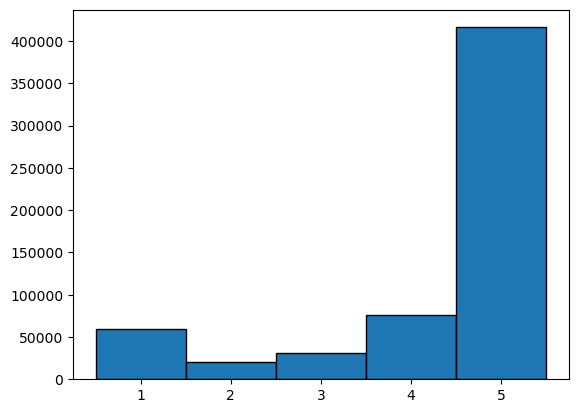

In [35]:
#visualize distribution of 'overall' scores given by all users
hist, edges = np.histogram(df['overall'], bins=np.arange(1,7)-0.5)
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))
plt.xticks(np.arange(1,6))
plt.show()

Most users would give a score of 5.

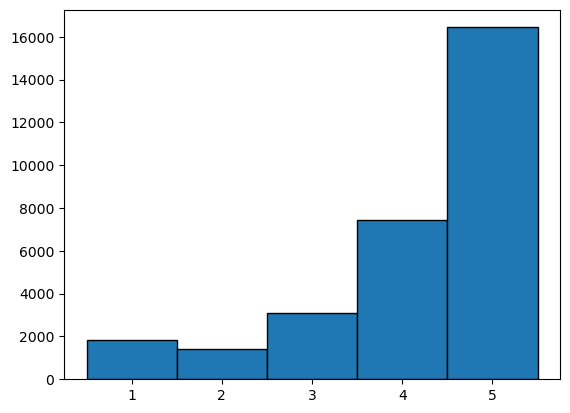

In [43]:
ave_overall_per_product = pd.DataFrame(df.groupby(['asin'])['overall'].mean())
ave_overall_per_product.sort_values(by=['overall'],inplace=True,ascending=False)
#visualize distribution of average 'overall' scores of every product
hist, edges = np.histogram(ave_overall_per_product['overall'], bins=np.arange(1,7)-0.5)
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))
plt.xticks(np.arange(1,6))
plt.show()

Most products were given an average score of 5 by users.

In [58]:
df['vote'] = df['vote'].str.replace(',', '')  # Remove commas from the column
df['vote'] = df['vote'].fillna(0)  # Fill NaN values with 0
df['vote'] = df['vote'].astype(int)  # Convert the column to integer type
#find sum of votes for each product
total_vote_perProduct = pd.DataFrame(df.groupby('asin')['vote'].sum())
total_vote_perProduct.sort_values(by=['vote'],ascending=False,inplace=True)

AttributeError: Can only use .str accessor with string values!

In [69]:
total_vote_perProduct.describe()

,vote
count,30252.000000
mean,34.527502
std,2872.014791
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,498984.000000


- algorithm 1: content-based.
- algorithm 2: random recommendation of the best selling items.